In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
test = pd.read_csv('test.csv')
test

,sentiment,text
0,neutral,Kredi kullanmak istiyorum
1,positive,Supercell senin tüm oyunlarını oynadım brawl s...
2,positive,sizleri seviyorum clash of clans bide hay day ...
3,positive,Supercell brawl stars chas of chas ve chas roy...
4,positive,Çok sevdim. Ama fıstıllar çok yavaş büyüyor. S...
...,...,...
222,positive,En sevdiğim marka
223,neutral,Bilader uygulama cok güzel de guncelleyin sunu...
224,neutral,Kıyafetleri gerçekten hoş eleştiri bölümünde g...
225,negative,"Uygulama üzerinden sipariş verdim, sipariş ona..."


In [3]:
train = pd.read_csv('train.csv')
train

,Verbatim,sentiment
0,Alt yapı çok yetersiz telefon hattım çoğu yerd...,negative
1,Evimde sadece 1 tek odada çekiyor onuda cama y...,negative
2,Çekim gücü çok zayıf internet de,negative
3,Hızınız çok yetersiz Tarifelerde İnternet pake...,negative
4,Bulunduğum yerde internet kalitesi E olarak gö...,negative
...,...,...
1298,En sevdiğim marka,positive
1299,Bilader uygulama cok güzel de guncelleyin sunu...,neutral
1300,Kıyafetleri gerçekten hoş eleştiri bölümünde g...,neutral
1301,"Uygulama üzerinden sipariş verdim, sipariş ona...",negative


# E.D.A.

In [4]:
train.loc[1297,'Verbatim']

'Ne aldıysam memnun kaldım😍😍 seni seviyoruz hm.'

In [5]:
train.sentiment.unique()

array(['negative', 'neutral', 'positive', 'pozitive', nan, 'neagtive'],
      dtype=object)

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

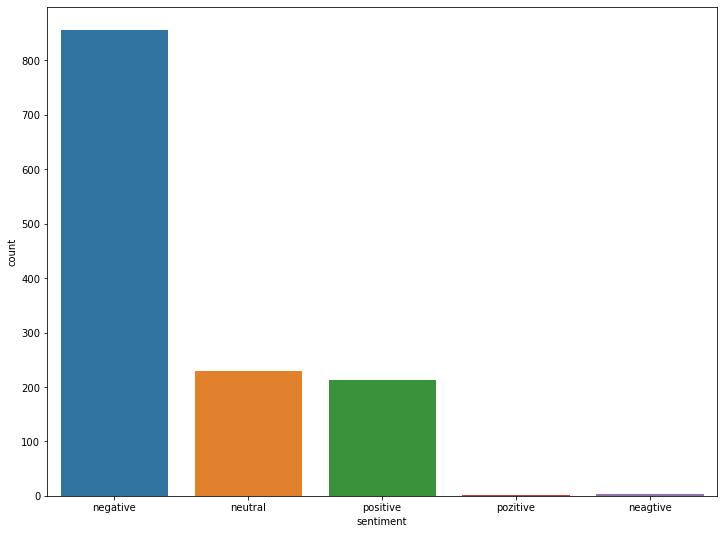

In [6]:
plt.figure(figsize=(12,9))
sns.countplot(train.sentiment)

In [7]:
train.sentiment = train.sentiment.map({'negative':0,'neagtive':0,'neutral':1,'positive':2,'pozitive':2})
train.sentiment.value_counts(dropna=False)

0.0    860
1.0    229
2.0    213
NaN      1
Name: sentiment, dtype: int64

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

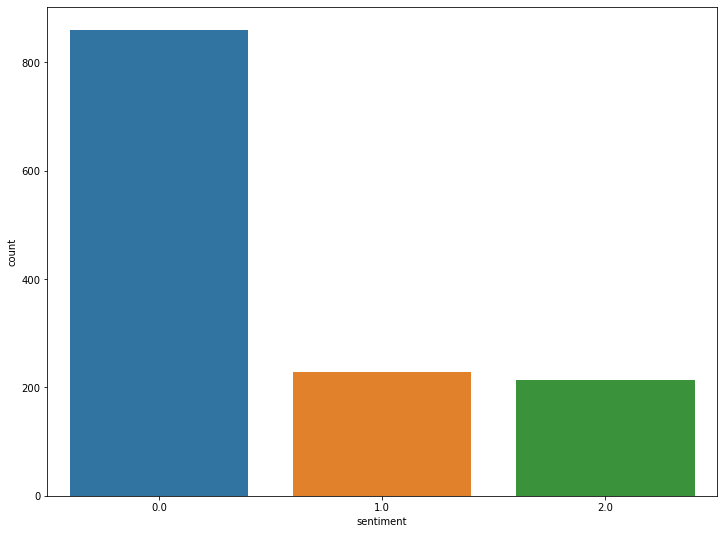

In [8]:
plt.figure(figsize=(12,9))
sns.countplot(train.sentiment)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Verbatim   1303 non-null   object 
 1   sentiment  1302 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


# Missing Values

In [10]:
train.isnull().sum()

Verbatim     0
sentiment    1
dtype: int64

In [11]:
train[train.sentiment.isnull()]

,Verbatim,sentiment
1051,Kapalı alanlarda zaten çekim gücü çok az. Buna...,NaN


In [12]:
train[train.sentiment.isnull()].index

Int64Index([1051], dtype='int64')

In [13]:
train.loc[1051,'Verbatim']

'Kapalı alanlarda zaten çekim gücü çok az. Buna ek olarak telefon 4 diş çekip de 4.5G \r\ngözükmesine rağmen açık alanlarda bile kısa süreliğine internet kesiliyor. Bu durumdan \r\ndolayı operatörümü değiştireceğim.'

In [14]:
train.loc[1051,'sentiment'] = 0

In [15]:
train.loc[1051,['Verbatim','sentiment']]

Verbatim     Kapalı alanlarda zaten çekim gücü çok az. Buna...
sentiment                                                    0
Name: 1051, dtype: object

In [16]:
j=0
for i in train.Verbatim:
    
    print('**',j,str(i),'\n')
    j+=1


** 0 Alt yapı çok yetersiz telefon hattım çoğu yerde çekmiyor 

** 1 Evimde sadece 1 tek odada çekiyor onuda cama yapışarak görüşme yapıyorum  Sizi aradığımda   o bölgede şebeke sıkıntısı görünmüyor  diyip konuşmayı bitirdiniz 

** 2 Çekim gücü çok zayıf internet de 

** 3 Hızınız çok yetersiz Tarifelerde İnternet paketleri çok az 

** 4 Bulunduğum yerde internet kalitesi E olarak görünüyor ve arayanlar ulaşamıyor Kalite beklentisiyleTürk Telekomden geçiş yaptım fakat ilk üç ay dolmasını bekliyorum Başka operatör kullanmayı düşünüyorum 

** 5 neredeyse Turkcell her yerde çekiyor vodafone hiç çekmiyor bu yüzden hattımı değiştireceğim 

** 6 Biz kütahya Emmet subak köyünde oturuyoruz vodafone hic çekmiyor tepelere  veya köy dışına çıkarsak konuşabiliyoruz  onun için herkes başka hatlara başlıyor 

** 7 Vericileri sıklastirin trabzon akcaabat bir cok köyünde vodafone birakin interneti telefon çekmiyor aldiginiz paralarin hakkini verin 

** 8 Alt yapı ve sinyal güçlendirme yapmaları gerek 

# Cleaning Noisy Words, Punctuations,Emojis

**Typo Correction**

useless

In [17]:
#pip install autocorrect==2.2.2
from autocorrect import Speller            #alternative typo correction
#

In [145]:
spell = Speller('tr')
spell('benm')

'benm'

# Due to the fact that all the reviews is turkish, I used "emoji" library. 

In [19]:
#pip install emoji

In [20]:
x = 'Ne aldıysam memnun kaldım😍😍 seni seviyoruz hm.'

In [21]:
import emoji
print(emoji.demojize(x))

Ne aldıysam memnun kaldım:smiling_face_with_heart-eyes::smiling_face_with_heart-eyes: seni seviyoruz hm.


In [22]:
stop_words = stopwords.words("turkish")
lem = WordNetLemmatizer()
stem = PorterStemmer()

In [23]:
def text_mining(x):
    
    """This function does tokenizaton, noise removal and lexicon normalization in sequence."""
    
    """Word Tokenize"""
    process_1 = word_tokenize(x.lower())
    """Removing Non-alphabetic tokens"""
    process_2 = [w for w in process_1 if w.isalpha()]
    """Removing Stopwords"""
    process_3 = [y for y in process_2 if y not in stop_words]
    "Using lemmatize function on tokens"
    process_4 = [lem.lemmatize(z) for z in process_3]
    
    return " ".join(process_4)

In [24]:
#pip install turkishnlp

# x = 'Ne aldıysam memnun kaldım😍😍 seni seviyoruz hm.' 

In [25]:
text_mining('Ne aldıysam memnun kaldım:smiling_face_with_heart-eyes::smiling_face_with_heart-eyes: seni seviyoruz hm.')

'aldıysam memnun kaldım seni seviyoruz hm'

implement text_mining func.

In [26]:
train["Verbatim"] =train["Verbatim"].apply(text_mining)
train["Verbatim"]

0       alt yapı yetersiz telefon hattım çoğu yerde çe...
1       evimde sadece tek odada çekiyor onuda cama yap...
2                               çekim gücü zayıf internet
3                  hızınız yetersiz tarifelerde paketleri
4       bulunduğum yerde internet kalitesi e olarak gö...
                              ...                        
1298                                       sevdiğim marka
1299    bilader uygulama cok güzel guncelleyin sunu el...
1300    kıyafetleri gerçekten hoş eleştiri bölümünde g...
1301    uygulama üzerinden sipariş verdim sipariş onay...
1302    haziran ayı bir kaç tshirt almıştım siteden si...
Name: Verbatim, Length: 1303, dtype: object

In [27]:
train.Verbatim.loc[1]

'evimde sadece tek odada çekiyor onuda cama yapışarak görüşme yapıyorum sizi aradığımda bölgede şebeke sıkıntısı görünmüyor diyip konuşmayı bitirdiniz'

In [28]:
train.sample(25)

,Verbatim,sentiment
694,konuşurken hat kendiliğinden kapanıyor,0.0
321,sebeke sorunu oluyor video izlerken hızı yavaş...,0.0
781,iyi bir çekim iyi bir alt yapı,1.0
264,hızı kapalı ortamlarda bazen yavaşlıyor,0.0
47,evimde hat çekmiyor,0.0
976,kopma oluyor görüşmelerde kesintiler oluyor,0.0
1124,iyi geceler hay day oyununu severek oynuyorum ...,1.0
1295,severek alıyor kullanıyoruz,1.0
1020,memlunum teşekkürler vodafone,2.0
1081,on numara beş yıldız yorumum verdiğim puan çal...,0.0


**Test set cleaning which is only for prediction**

In [29]:
test.isnull().sum()

sentiment    0
text         0
dtype: int64

In [30]:
test.sentiment.value_counts(dropna=False)

positive    172
neutral      37
negative     18
Name: sentiment, dtype: int64

In [31]:
test.sentiment = test.sentiment.map({'negative':0,'neutral':2,'positive':4})
test.sentiment

0      2
1      4
2      4
3      4
4      4
      ..
222    4
223    2
224    2
225    0
226    2
Name: sentiment, Length: 227, dtype: int64

In [32]:
test.text = test.text.apply(text_mining)

In [33]:
test.text

0                              kredi kullanmak istiyorum
1      supercell senin oyunlarını oynadım brawl star ...
2      sizleri seviyorum clash of clan bide hay day g...
3      supercell brawl star chas of chas chas royale ...
4      sevdim fıstıllar yavaş büyüyor sadece bunun dü...
                             ...                        
222                                       sevdiğim marka
223    bilader uygulama cok güzel guncelleyin sunu el...
224    kıyafetleri gerçekten hoş eleştiri bölümünde g...
225    uygulama üzerinden sipariş verdim sipariş onay...
226    haziran ayı bir kaç tshirt almıştım siteden si...
Name: text, Length: 227, dtype: object

# Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train.Verbatim.values, train.sentiment.values, test_size=0.3, random_state=42)

# Count Vectorization

AKA One-Hot Encoding: We will be creating vectors that have a dimensionality equal to the size of our vocabulary, and if the text data features that vocab word, we will put a one in that dimension. Every time we encounter that word again, we will increase the count, leaving 0s everywhere we did not find the word even once.

In [163]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/proxy/1*YEJf9BQQh0ma1ECs6x_7yQ.png")

In [35]:
countvector = CountVectorizer()
countvector.fit(X_train)
X_train_countvec = countvector.transform(X_train)
X_test_countvec = countvector.transform(X_test)

In [36]:
X_test_countvec.shape

(391, 4779)

**Logistic Regression**

In [37]:
log_model = LogisticRegression()
log_model.fit(X_train_countvec, y_train)
y_pred_log_model = log_model.predict(X_test_countvec)
log_predicted_prob = log_model.predict_proba(X_test_countvec)
print(confusion_matrix(y_test, y_pred_log_model))
print("\n")
print(classification_report(y_test, y_pred_log_model))

[[238  16   4]
 [ 20  44   6]
 [  5   3  55]]


              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       258
         1.0       0.70      0.63      0.66        70
         2.0       0.85      0.87      0.86        63

    accuracy                           0.86       391
   macro avg       0.82      0.81      0.81       391
weighted avg       0.86      0.86      0.86       391



In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [39]:
recall = recall_score(y_test, y_pred_log_model,average='weighted')
precision = precision_score(y_test, y_pred_log_model,average='weighted')

Accuracy: 0.86
Auc: 0.95
Detail:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       258
         1.0       0.70      0.63      0.66        70
         2.0       0.85      0.87      0.86        63

    accuracy                           0.86       391
   macro avg       0.82      0.81      0.81       391
weighted avg       0.86      0.86      0.86       391



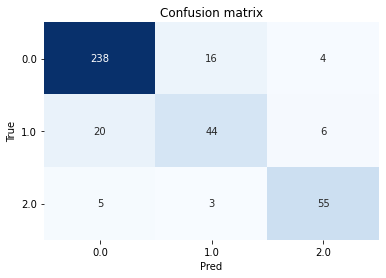

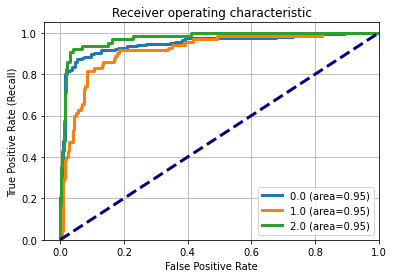

In [40]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred_log_model)
auc = roc_auc_score(y_test, log_predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, y_pred_log_model))
    
## Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_log_model)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig = plt.figure()
ax = fig.add_subplot(111)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           log_predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              roc_auc_score(y_test, log_predicted_prob, 
                            multi_class="ovr"))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)
    


**Random Forest**

In [41]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_countvec, y_train)
y_pred_rfc_model = rfc_model.predict(X_test_countvec)
rfc_predicted_prob = rfc_model.predict_proba(X_test_countvec)
print(confusion_matrix(y_test, y_pred_rfc_model))
print("\n")
print(classification_report(y_test, y_pred_rfc_model))

[[239  13   6]
 [ 24  36  10]
 [  6   0  57]]


              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       258
         1.0       0.73      0.51      0.61        70
         2.0       0.78      0.90      0.84        63

    accuracy                           0.85       391
   macro avg       0.80      0.78      0.78       391
weighted avg       0.84      0.85      0.84       391



Accuracy: 0.86
Auc: 0.95
Detail:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       258
         1.0       0.70      0.63      0.66        70
         2.0       0.85      0.87      0.86        63

    accuracy                           0.86       391
   macro avg       0.82      0.81      0.81       391
weighted avg       0.86      0.86      0.86       391



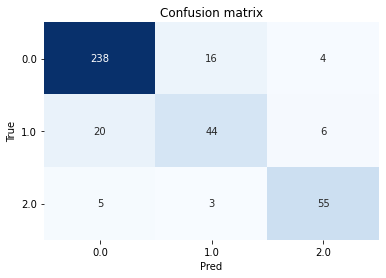

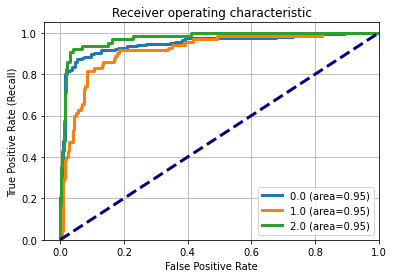

In [42]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred_log_model)
auc = roc_auc_score(y_test, log_predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, y_pred_log_model))
    
## Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_log_model)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig = plt.figure()
ax = fig.add_subplot(111)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           log_predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              roc_auc_score(y_test, log_predicted_prob, 
                            multi_class="ovr"))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)
    

**LSTM**

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SpatialDropout1D

from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train.Verbatim.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6026 unique tokens.


In [45]:
X = tokenizer.texts_to_sequences(train.Verbatim.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1303, 250)


In [46]:
Y = pd.get_dummies(train.sentiment).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1303, 3)


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

**The first layer is the embedded layer that uses 100 length vectors to represent each word.** 
**SpatialDropout1D performs variational dropout in NLP models.**
**The next layer is the LSTM layer with 100 memory units.**
**The output layer must create 3 output values, one for each class.**
**Activation function is softmax for multi-class classification.**
**Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.**

In [48]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/10
17/17 [==============================] - 21s 991ms/step - loss: 1.0348 - accuracy: 0.5828 - val_loss: 0.9024 - val_accuracy: 0.6610
Epoch 2/10
17/17 [==============================] - 15s 885ms/step - loss: 0.8759 - accuracy: 0.6446 - val_loss: 0.8235 - val_accuracy: 0.6610
Epoch 3/10
17/17 [==============================] - 15s 914ms/step - loss: 0.7626 - accuracy: 0.6523 - val_loss: 0.6540 - val_accuracy: 0.6949
Epoch 4/10
17/17 [==============================] - 16s 959ms/step - loss: 0.4786 - accuracy: 0.8070 - val_loss: 0.5596 - val_accuracy: 0.7797
Epoch 5/10
17/17 [==============================] - 16s 928ms/step - loss: 0.3382 - accuracy: 0.9174 - val_loss: 0.4866 - val_accuracy: 0.8136
Epoch 6/10
17/17 [==============================] - 16s 944ms/step - loss: 0.2225 - accuracy: 0.9248 - val_loss: 0.4398 - val_accuracy: 0.8390
Epoch 7/10
17/17 [==============================] - 20s 1s/step - loss: 0.1699 - accuracy: 0.9404 - val_loss: 0.4186 - val_accuracy: 0.8390
Ep

In [49]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy[0],accuracy[1]))

5/5 [==============================] - 0s 62ms/step - loss: 0.2980 - accuracy: 0.8702
Test set
  Loss: 0.298
  Accuracy: 0.870


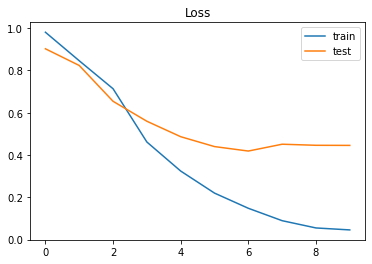

In [50]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


**this is obviously overfitting**

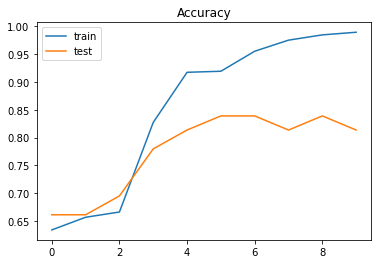

In [51]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

**So Logistic Regression gave best results.For that reason,will try model tuning with logistic regression**

# Tuning with Logistic Regression

**No change for results**

In [52]:
params_log = {"penalty":["l1", "l2", "elasticnet"],
              "C":[0.5,1,1.5],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

In [53]:
log_model_countvec_rand = RandomizedSearchCV(LogisticRegression(), param_distributions=params_log, n_jobs=-1, cv=3).fit(X_train_countvec, y_train)
print(log_model_countvec_rand.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 1.5}


C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [54]:
log_model_CV = LogisticRegression(solver="saga", penalty="l2", C=1.5)
log_model_CV.fit(X_train_countvec, y_train)
y_pred_log_model_CV = log_model_CV.predict(X_test_countvec)
log_CV_predicted_prob = log_model_CV.predict_proba(X_test_countvec)
print(confusion_matrix(y_test, y_pred_log_model_CV))
print("\n")
print(classification_report(y_test, y_pred_log_model))

[[236  16   6]
 [ 15  48   7]
 [  4   2  57]]


              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       258
         1.0       0.70      0.63      0.66        70
         2.0       0.85      0.87      0.86        63

    accuracy                           0.86       391
   macro avg       0.82      0.81      0.81       391
weighted avg       0.86      0.86      0.86       391



C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy: 0.87
Auc: 0.95
Detail:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       258
         1.0       0.73      0.69      0.71        70
         2.0       0.81      0.90      0.86        63

    accuracy                           0.87       391
   macro avg       0.82      0.84      0.83       391
weighted avg       0.87      0.87      0.87       391



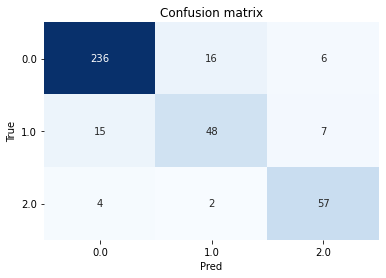

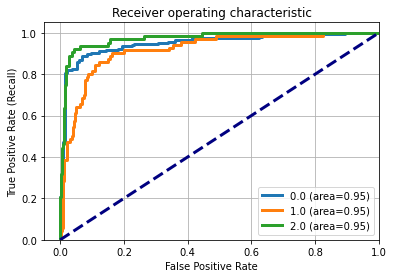

In [55]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred_log_model_CV)
auc = roc_auc_score(y_test, log_CV_predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, y_pred_log_model_CV))
    
## Plot confusion matrix
cm = confusion_matrix(y_test,y_pred_log_model_CV)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig = plt.figure()
ax = fig.add_subplot(111)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           log_CV_predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              roc_auc_score(y_test,log_CV_predicted_prob, 
                            multi_class="ovr"))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)

# Let's try different type of vectorization

# TF-IDF

In [164]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/proxy/1*HM0Vcdrx2RApOyjp_ZeW_Q.png")

The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

Inverse Data Frequency (IDF)

The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

In [165]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/proxy/1*A5YGwFpcTd0YTCdgoiHFUw.png")

Lastly, the TF-IDF is simply the TF multiplied by IDF.

In [166]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/proxy/1*nSqHXwOIJ2fa_EFLTh5KYw.png")

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train.Verbatim.values, train.sentiment.values, test_size=0.3, random_state=42)

In [57]:
tfidfvector = TfidfVectorizer()
tfidfvector.fit(X_train)
X_train_tfidfvec = tfidfvector.transform(X_train)
X_test_tfidfvec = tfidfvector.transform(X_test)

**As we see, the results aren't better than count vectorizer with logistic regression. I decide not forward with TF-IDF**

In [58]:
log_model2 = LogisticRegression()
log_model2.fit(X_train_tfidfvec, y_train)
y_pred_log_model2 = log_model2.predict(X_test_tfidfvec)
log2_predicted_prob= log_model2.predict_proba(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_log_model2))
print("\n")
print(classification_report(y_test, y_pred_log_model2))

[[251   6   1]
 [ 37  31   2]
 [ 17   0  46]]


              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       258
         1.0       0.84      0.44      0.58        70
         2.0       0.94      0.73      0.82        63

    accuracy                           0.84       391
   macro avg       0.87      0.72      0.76       391
weighted avg       0.84      0.84      0.82       391



Accuracy: 0.84
Auc: 0.96
Detail:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       258
         1.0       0.84      0.44      0.58        70
         2.0       0.94      0.73      0.82        63

    accuracy                           0.84       391
   macro avg       0.87      0.72      0.76       391
weighted avg       0.84      0.84      0.82       391



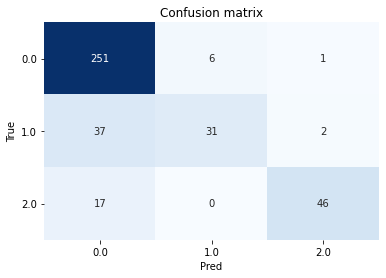

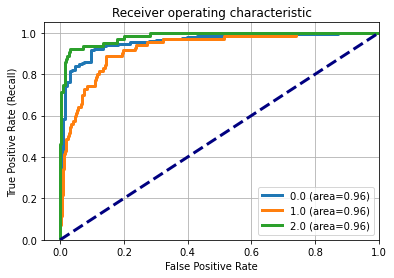

In [59]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred_log_model2)
auc = roc_auc_score(y_test, log2_predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, y_pred_log_model2))
    
## Plot confusion matrix
cm = confusion_matrix(y_test,y_pred_log_model2)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig = plt.figure()
ax = fig.add_subplot(111)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           log2_predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              roc_auc_score(y_test,log2_predicted_prob, 
                            multi_class="ovr"))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)


In [60]:
rfc_model2 = RandomForestClassifier()
rfc_model2.fit(X_train_tfidfvec, y_train)
y_pred_rfc_model2 = rfc_model2.predict(X_test_tfidfvec)
rfc_predicted_prob = rfc_model2.predict_proba(X_test_tfidfvec)
print(confusion_matrix(y_test, y_pred_rfc_model2))
print("\n")
print(classification_report(y_test, y_pred_rfc_model2))

[[239  13   6]
 [ 23  37  10]
 [  5   1  57]]


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       258
         1.0       0.73      0.53      0.61        70
         2.0       0.78      0.90      0.84        63

    accuracy                           0.85       391
   macro avg       0.80      0.79      0.79       391
weighted avg       0.85      0.85      0.85       391



Accuracy: 0.85
Auc: 0.93
Detail:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       258
         1.0       0.73      0.53      0.61        70
         2.0       0.78      0.90      0.84        63

    accuracy                           0.85       391
   macro avg       0.80      0.79      0.79       391
weighted avg       0.85      0.85      0.85       391



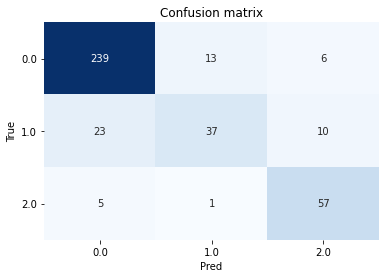

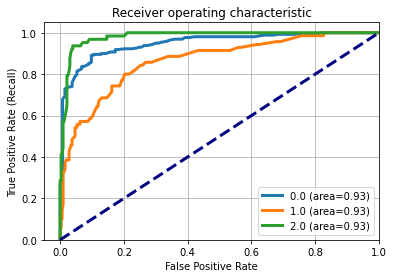

In [61]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred_rfc_model2)
auc = roc_auc_score(y_test, rfc_predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, y_pred_rfc_model2))
    
## Plot confusion matrix
cm = confusion_matrix(y_test,y_pred_rfc_model2)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig = plt.figure()
ax = fig.add_subplot(111)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           rfc_predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              roc_auc_score(y_test,rfc_predicted_prob, 
                            multi_class="ovr"))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)

# Word2Vec Word_Embeddings

**Word Embedding is the collective name for feature learning techniques where words from the vocabulary are mapped to vectors of real numbers. These vectors are calculated from the probability distribution for each word appearing before or after another. **

CBOW - Skipgram

use cosine similarity

In [62]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [63]:
model = Word2Vec.load('word2vec.model')

In [64]:
corpus = train.Verbatim

In [ ]:
lst_corpus = [ i for i in corpus.apply(lambda x :x.split())]
lst_corpus

In [66]:
## fit w2v
nlp = Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

In [67]:
nlp

In [68]:
word = 'internet'

In [69]:
nlp[word].shape

<ipython-input-69-df48be5baad4>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  nlp[word].shape


(300,)

**Most Similar words**

<ipython-input-70-3e4499d98101>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  nlp.most_similar(word, topn=20)]
<ipython-input-70-3e4499d98101>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = nlp[tot_words]
C:\Users\MONSTER\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


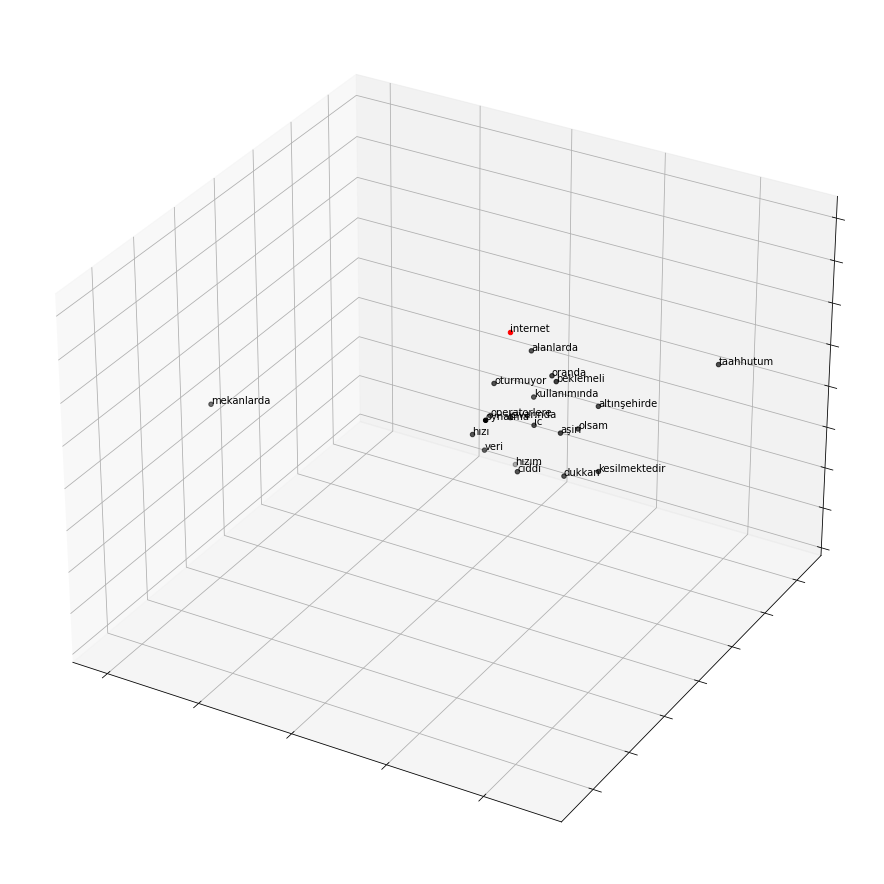

In [70]:
fig = plt.figure(figsize=(20,16))
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [71]:
## tokenize text
tokenizer = Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

In [72]:
X_train

array([[  17,   67,  115, ...,    0,    0,    0],
       [  68,   69,  100, ...,  122,    5,  348],
       [   6,   15,   45, ...,    0,    0,    0],
       ...,
       [2023,  125,  802, ..., 1969,   11, 6009],
       [ 106,  598,  129, ...,  129,  297,  862],
       [6014, 6015,    3, ..., 6023,   49,  806]])

In [73]:
X_train.shape

(1303, 15)

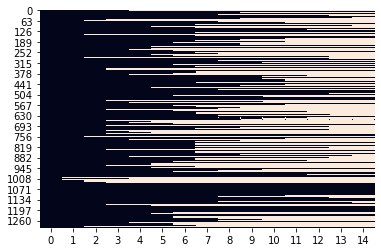

In [74]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

**Let’s print how a text from the train set has been transformed into a sequence with the padding and the vocabulary.**

In [75]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(train["Verbatim"].iloc[i].split())
print("from: ", train["Verbatim"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", train["Verbatim"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[train["Verbatim"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  alt yapı yetersiz telefon hattım çoğu yerde çekmiyor | len: 8
to:  [ 17  67 115   9 240  94  12   2   0   0   0   0   0   0   0] | len: 15
check:  alt  -- idx in vocabulary --> 17
vocabulary:  {'NaN': 1, 'çekmiyor': 2, 'bir': 3, 'internet': 4, 'şebeke': 5} ... (padding element, 0)


**same feature engineering on the test set as well**

In [76]:
corpus_test = test.text

## create list of n-grams
lst_corpus_test = [ i for i in corpus.apply(lambda x :x.split())]
lst_corpus_test
    

## text to sequence with the fitted tokenizer
lst_text2seq =tokenizer.texts_to_sequences(lst_corpus_test)

## padding sequence
X_test = pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [77]:
X_test

array([[  17,   67,  115, ...,    0,    0,    0],
       [  68,   69,  100, ...,  122,    5,  348],
       [   6,   15,   45, ...,    0,    0,    0],
       ...,
       [2023,  125,  802, ..., 1969,   11, 6009],
       [ 106,  598,  129, ...,  129,  297,  862],
       [6014, 6015,    3, ..., 6023,   49,  806]])

In [78]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

<ipython-input-78-9112dbec5449>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings[idx] =  nlp[word]


In [79]:
word = "internet"

In [80]:
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

dic[word]: 4 |idx
embeddings[idx]: (300,) |vector


# Bidirectional LSTM

**At the moment, this isn't a good idea**

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)

## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15,  
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15))(x)
## final dense layers
x = layers.Dense(1024, activation='relu')(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
model = keras.Model(x_in, y_out)
model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"]
    )


model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 300)           1808400   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 30)            37920     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30)                5520      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              31744     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656

In [83]:
#### encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(train.sentiment))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in train.sentiment])
#y_train = train.sentiment
#y_train.shape
print(dic_y_mapping)
print(inverse_dic)
print(y_train)

{0: 0.0, 1: 1.0, 2: 2.0}
{0.0: 0, 1.0: 1, 2.0: 2}
[0 0 0 ... 1 0 1]


In [84]:
X_train.shape

(1303, 15)

In [85]:
training = model.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=1, 
                     validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
training

Epoch 1/10
4/4 [==============================] - 10s 687ms/step - loss: 1.0550 - accuracy: 0.4644 - val_loss: 1.2220 - val_accuracy: 0.3555
Epoch 2/10
4/4 [==============================] - 0s 87ms/step - loss: 0.6383 - accuracy: 0.7897 - val_loss: 2.7446 - val_accuracy: 0.3555
Epoch 3/10
4/4 [==============================] - 0s 83ms/step - loss: 0.5592 - accuracy: 0.7832 - val_loss: 2.0105 - val_accuracy: 0.3555
Epoch 4/10
4/4 [==============================] - 0s 80ms/step - loss: 0.5211 - accuracy: 0.7948 - val_loss: 2.1882 - val_accuracy: 0.3555


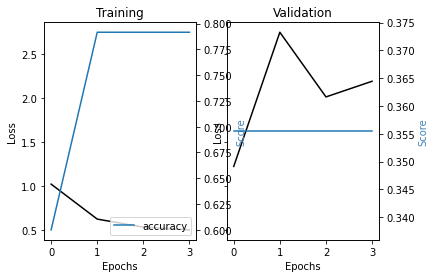

In [86]:
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

# So, With the Count Vectorizer, I decided to move forward with my first Logistic Regression which has the best score

In [170]:
train.sentiment = train.sentiment.map({0:0, 1:2, 2:4})
train.sentiment.value_counts(dropna=False)

0    861
2    229
4    213
Name: sentiment, dtype: int64

In [175]:
train.head()

,Verbatim,sentiment
0,alt yapı yetersiz telefon hattım çoğu yerde çe...,0
1,evimde sadece tek odada çekiyor onuda cama yap...,0
2,çekim gücü zayıf internet,0
3,hızınız yetersiz tarifelerde paketleri,0
4,bulunduğum yerde internet kalitesi e olarak gö...,0


In [172]:
test.sentiment = test.sentiment.map({0:0, 1:2, 2:4})
test.sentiment.value_counts(dropna=False)

4    172
2     37
0     18
Name: sentiment, dtype: int64

In [173]:
test.head()

,sentiment,text
0,2,kredi kullanmak istiyorum
1,4,supercell senin oyunlarını oynadım brawl star ...
2,4,sizleri seviyorum clash of clan bide hay day g...
3,4,supercell brawl star chas of chas chas royale ...
4,4,sevdim fıstıllar yavaş büyüyor sadece bunun dü...


In [176]:
X_train, X_test, y_train, y_test = train_test_split(train.Verbatim.values, train.sentiment.values, test_size=0.3, random_state=42)

In [177]:
countvector = CountVectorizer()
countvector.fit(X_train)
X_train_countvec = countvector.transform(X_train)
X_test_countvec = countvector.transform(X_test)


In [178]:
log_model = LogisticRegression()
log_model.fit(X_train_countvec, y_train)
y_pred_log_model = log_model.predict(X_test_countvec)
log_predicted_prob = log_model.predict_proba(X_test_countvec)
print(confusion_matrix(y_test, y_pred_log_model))
print("\n")
print(classification_report(y_test, y_pred_log_model))

[[238  16   4]
 [ 20  44   6]
 [  5   3  55]]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       258
           2       0.70      0.63      0.66        70
           4       0.85      0.87      0.86        63

    accuracy                           0.86       391
   macro avg       0.82      0.81      0.81       391
weighted avg       0.86      0.86      0.86       391



In [179]:
test.head()

,sentiment,text
0,2,kredi kullanmak istiyorum
1,4,supercell senin oyunlarını oynadım brawl star ...
2,4,sizleri seviyorum clash of clan bide hay day g...
3,4,supercell brawl star chas of chas chas royale ...
4,4,sevdim fıstıllar yavaş büyüyor sadece bunun dü...


**time to test with test data set**

In [182]:
test_vec_text = countvector.transform(test.text)
test_vec_text[0]

<1x4779 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

our logistic regression model's negative prediction success (91% f1 score ) is  high compared to others.

neutral prediction is ratherly low (66% f1 score)

positve prediction is generally acceptable(86% f1 score)

In [196]:
pred_values = log_model.predict_proba(test_vec_text)
pred_values#
# From the scores, find the label with the highest score/probability
predicted_sentiments = pred_values.argmax(axis=1)
predicted_sentiments


array([0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 0, 1], dtype=int64)

In [197]:
predicted_sentiments = pd.DataFrame(predicted_sentiments,columns=['pred']).replace({0:0, 1:2, 2:4})
predicted_sentiments.head()

,pred
0,0
1,4
2,4
3,4
4,4


C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pred', ylabel='count'>

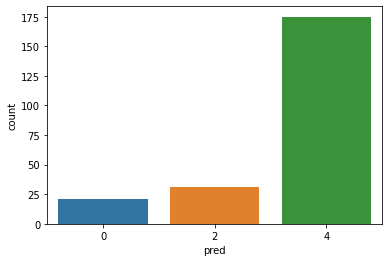

In [198]:
sns.countplot(predicted_sentiments.pred)

**Comparison true value vs predicted value**

In [199]:
comparison = pd.DataFrame()

In [200]:
comparison['True'] = test.sentiment

In [201]:
comparison['predicted'] = predicted_sentiments.pred

In [202]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [203]:
comparison.head()

,True,predicted
0,2,0
1,4,4
2,4,4
3,4,4
4,4,4


In [204]:
comparison['review'] = test.text

0 = neagative, 
2 = neutral, 
4 = positive

In [205]:
comparison.head()

,True,predicted,review
0,2,0,kredi kullanmak istiyorum
1,4,4,supercell senin oyunlarını oynadım brawl star ...
2,4,4,sizleri seviyorum clash of clan bide hay day g...
3,4,4,supercell brawl star chas of chas chas royale ...
4,4,4,sevdim fıstıllar yavaş büyüyor sadece bunun dü...


In [206]:
actual = comparison['True'].value_counts()
actual

4    172
2     37
0     18
Name: True, dtype: int64

In [207]:
pred = comparison['predicted'].value_counts()
pred

4    175
2     31
0     21
Name: predicted, dtype: int64

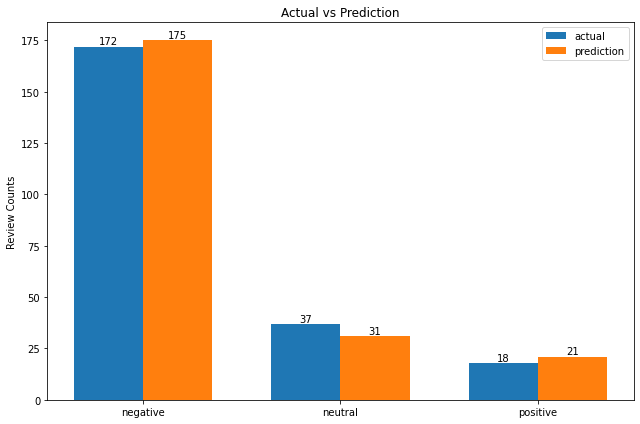

In [208]:
labels = ['negative','neutral','positive']
a = actual
p =pred
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(x - width/2, a, width, label='actual')
rects2 = ax.bar(x + width/2, p, width, label='prediction')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Review Counts')
ax.set_title('Actual vs Prediction')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%d' % int(height),
            ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%d' % int(height),
            ha='center', va='bottom')    
    
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

As a result, with the 86% accuracy value is not bad, However, we need to improve model's accuracy which should be at least 95% for our product. 
So, if we feed with more data, accuracy rate definetly will increase. Also this is the healtiest way.
